In [341]:
import warnings
warnings.simplefilter('ignore')

In [1]:
import pandas as pd
import numpy as np

In [2]:
from pandas_profiling import ProfileReport

In [3]:
df = pd.read_csv('../data/census.csv')

In [4]:
df.head(1)

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [5]:
colnames = [c.replace('-','_').strip() for c in df.columns]
colnames

['age',
 'workclass',
 'fnlgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'salary']

In [6]:
# Fix column names
df.columns = colnames

In [7]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [8]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlgt           32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.head(1)

,age,workclass,fnlgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [11]:
categorical_features = [
    'workclass',
    'education',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native_country',
    'salary'
]
numerical_features = ['age','fnlgt','education_num','capital_gain','capital_loss','hours_per_week']

In [65]:
for cat in categorical_features:
    print(cat, df[cat].nunique())
    display(df[cat].value_counts(dropna=False).to_frame('cnt').T)
    
# need to impute:
#   workclass "?"
#   occupation "?"
#   native_country "?"

workclass 8


,Private,Self-emp-not-inc,Local-gov,State-gov,Self-emp-inc,Federal-gov,Without-pay,Never-worked
cnt,24393,2495,2084,1293,1064,958,14,7


education 16


,HS-grad,Some-college,Bachelors,Masters,Assoc-voc,11th,Assoc-acdm,10th,7th-8th,Prof-school,9th,12th,Doctorate,5th-6th,1st-4th,Preschool
cnt,10468,7265,5292,1689,1378,1175,1064,929,646,515,513,433,390,333,168,50


marital_status 7


,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
cnt,14804,10651,4410,1019,987,414,23


occupation 14


,Prof-specialty,Craft-repair,Exec-managerial,Adm-clerical,Sales,Other-service,Machine-op-inspct,Transport-moving,Handlers-cleaners,Farming-fishing,Tech-support,Protective-serv,Priv-house-serv,Armed-Forces
cnt,5877,4088,3998,3760,3614,3291,2001,1596,1369,985,925,647,148,9


relationship 6


,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
cnt,13039,8251,5062,3427,1551,978


race 5


,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
cnt,27590,3111,1028,310,269


sex 2


,Male,Female
cnt,21580,10728


native_country 41


,United-States,Mexico,Philippines,Germany,Canada,Puerto-Rico,El-Salvador,India,Cuba,England,...,Cambodia,Trinadad&Tobago,Laos,Thailand,Yugoslavia,Outlying-US(Guam-USVI-etc),Honduras,Hungary,Scotland,Holand-Netherlands
cnt,29518,641,196,136,120,114,105,97,95,89,...,19,19,18,18,16,14,13,13,12,1


salary 2


,<=50K,>50K
cnt,24712,7596


In [13]:
# display(df.native_country.value_counts().to_frame('cnt'))

In [14]:
target = 'salary'
df[target].value_counts(normalize=True).to_frame('Percentage')
# imbalance class may need to use resampling technique

,Percentage
<=50K,0.75919
>50K,0.24081


In [15]:
#   workclass "?"
#   occupation "?"
#   native_country "?"

df.workclass.unique() # it's got spaces to clean

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [16]:
for cat in categorical_features:
    df[cat] = df[cat].apply(lambda s: s.strip())

In [17]:
# replace with nans
for cat in categorical_features:
    df.loc[df[cat]=="?", cat] = np.nan

In [18]:
# replace with most frequent
for col in categorical_features:
    df[col].fillna(df[col].mode().values[0], inplace=True)

In [21]:
for cat in numerical_features:
    print(cat, df[df[cat].isna()].shape[0])

age 0
fnlgt 0
education_num 0
capital_gain 0
capital_loss 0
hours_per_week 0


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

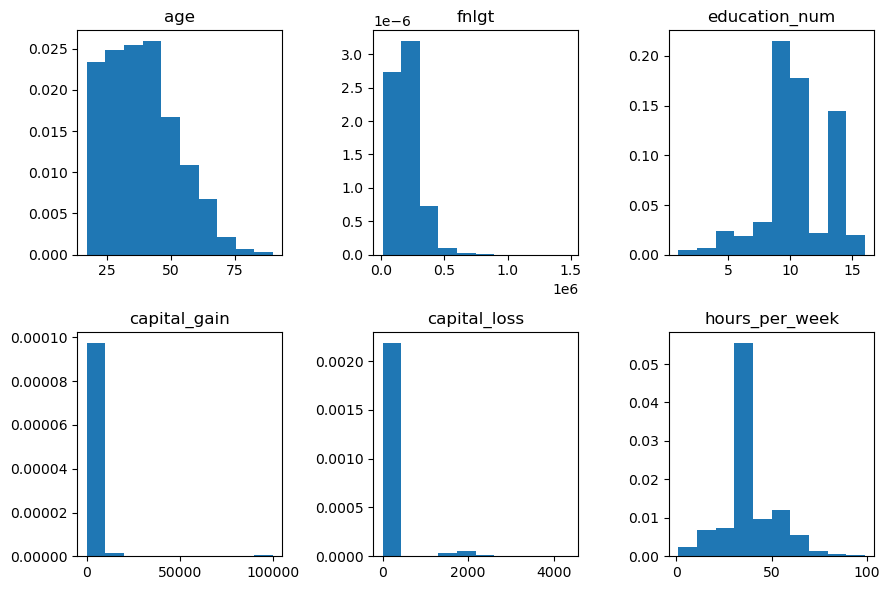

In [23]:
fig, axes = plt.subplots(2,3, figsize=(9,6))
for i,cat in enumerate(numerical_features):
    axes.flatten()[i].hist(df[cat], density=True)
    axes.flatten()[i].set_title(cat)
plt.tight_layout()

In [26]:
# obvious outlier in capital gain
print('outlier size: {0:.2f}'.format(df[df['capital_gain']>20000].shape[0]/df.shape[0]*100))

outlier size: 0.78


In [25]:
# obvious outlier in capital loss
print('outlier size: {0:.2f}'.format(df[df['capital_loss']>1000].shape[0]/df.shape[0]*100))

# /Note: dist very similar to cpaital gain. May not need to use as features

outlier size: 4.55


In [27]:
# remove outliers, i.e., less thatn 1%
print('before:', df.shape[0])
df = df[df.capital_gain<20000]
print('after :', df.shape[0])

before: 32561
after : 32308


In [55]:
# Instead of removing more outliers from capital loss, do feat eng 
df['capital_diff'] = (df['capital_gain'] - df['capital_loss'])

/var/folders/gm/77n7bpn55b1bqt9x5438x5h00000gn/T/ipykernel_28794/784624770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['capital_diff'] = (df['capital_gain'] - df['capital_loss'])


In [28]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [29]:
y = df[target]
X = df.drop(columns=[target])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [63]:
def create_capital_diff(df):
    df['capital_diff'] = df['capital_gain'] - df['capital_loss']
    return df

X_train = create_capital_diff(X_train)
X_test = create_capital_diff(X_test)

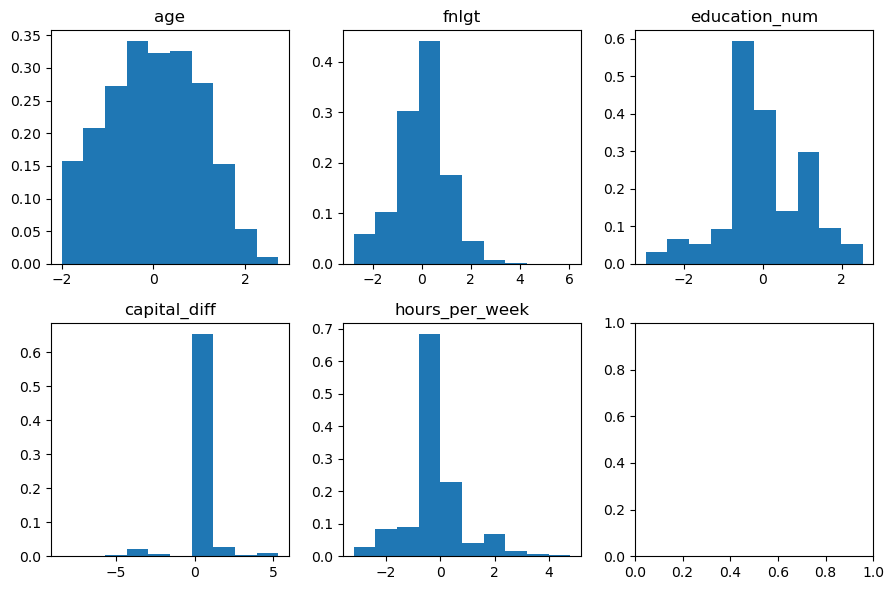

In [64]:
# Consider transformations

numerical_features = ['age','fnlgt','education_num','capital_diff','hours_per_week']

fig, axes = plt.subplots(2,3, figsize=(9,6))
for i,cat in enumerate(numerical_features):
    method = 'box-cox' if cat!='capital_diff' else 'yeo-johnson'
    pt = PowerTransformer(method=method)
    pt.fit(X_train[[cat]].values)
    axes.flatten()[i].hist(pt.transform(X_train[[cat]].values), density=True)
    axes.flatten()[i].set_title(cat)
plt.tight_layout()

In [292]:
df[['education_num','education']].sample(6)

,education_num,education
16807,10,Some-college
20489,11,Assoc-voc
16507,9,HS-grad
24274,9,HS-grad
26682,9,HS-grad
6459,8,12th


In [286]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

In [179]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTEENN

In [331]:
capital_diff_feature = ['capital_diff']
numeric_features = ['age','fnlgt','education_num','hours_per_week']
categorical_features = ['workclass', 'marital_status', 'occupation', 'relationship',
                        'race', 'sex', 'native_country']
# categorical_edu = ['education']

In [353]:
## Logistic Regression

numeric_transformer_others = make_pipeline(
    PowerTransformer(method='box-cox')
)
numeric_transformer_capital = make_pipeline(
    PowerTransformer(method='yeo-johnson')
)

categorical_transformer = make_pipeline(
    OneHotEncoder(drop='first',handle_unknown='ignore')
)

categorical_transformer_edu = make_pipeline(
    OrdinalEncoder()
)

linear_classifier = LogisticRegression(n_jobs=-1,max_iter=500)

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric_others", numeric_transformer_others, numeric_features),
        ("numeric_capital", numeric_transformer_capital, capital_diff_feature),
        ("categorical", categorical_transformer, categorical_features),
        #("categorical_edu", categorical_transformer_edu, categorical_edu),
    ],
    remainder="passthrough",  # This drops the columns that we do not transform
)


In [354]:
train_cols = numeric_features + categorical_features + ['capital_diff']

In [355]:
pipe_linear = imbPipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("resampler",  SMOTEENN(n_jobs=-1, random_state=42)),
        ("classifier", linear_classifier),
    ]
)


In [356]:
folds = 5
cv = KFold(n_splits=(folds - 1))
scores = cross_val_score(pipe_linear, X_train[train_cols], y_train, cv = cv,)
scores


array([0.7647868 , 0.76090246, 0.75402394, 0.75828862])

In [343]:
sum([0.7647868 , 0.76090246, 0.75402394, 0.75828862])/4

0.759500455

In [357]:
## Random Forest
#   dont need to transfom much for trees

# numeric_transformer_others = make_pipeline(
#     PowerTransformer(method='box-cox')
# )
# numeric_transformer_capital = make_pipeline(
#     PowerTransformer(method='yeo-johnson')
# )
numeric_transformer = make_pipeline(
    SimpleImputer()
)
categorical_transformer = make_pipeline(
    OneHotEncoder(drop='first',handle_unknown='ignore')
)

# categorical_transformer_edu = make_pipeline(
#     OrdinalEncoder()
# )

tree_classifier = RandomForestClassifier(n_jobs=-1)

preprocessor = ColumnTransformer(
    transformers=[
        #("numeric_others", numeric_transformer_others, numeric_features),
        #("numeric_capital", numeric_transformer_capital, capital_diff_feature),
        ('numeric', numeric_transformer, numeric_features+capital_diff_feature),
        ("categorical", categorical_transformer, categorical_features),
        #("categorical_edu", categorical_transformer_edu, categorical_edu),
    ],
    remainder="passthrough",  # This drops the columns that we do not transform
)


In [358]:
train_cols = numeric_features + categorical_features + ['capital_diff']

In [359]:
pipe_rf = imbPipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("resampler",  SMOTEENN(n_jobs=-1, random_state=42)),
        ("classifier", tree_classifier),
    ]
)

In [351]:
folds = 5
cv = KFold(n_splits=(folds - 1))
scores = cross_val_score(pipe_rf, X_train[train_cols], y_train, cv = cv,)
scores


array([0.84484182, 0.85018572, 0.84193149, 0.83918008])

In [352]:
sum([0.84484182, 0.85018572, 0.84193149, 0.83918008])/4

0.8440347774999999

In [360]:
### Pick Random Forest
pipe_rf = imbPipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("resampler",  SMOTEENN(n_jobs=-1, random_state=42)),
        ("classifier", tree_classifier),
    ]
)

In [362]:
pipe_rf.fit(X_train[train_cols], y_train)
y_pred = pipe_rf.predict(X_test)

In [363]:
print(classification_report(y_test, y_pred))
print('recall   :',recall_score(y_test, y_pred, pos_label='>50K'))
print('precision:',precision_score(y_test, y_pred, pos_label='>50K'))
print('accuracy :',accuracy_score(y_test, y_pred))
print('f1-score :',f1_score(y_test, y_pred, pos_label='>50K'))

              precision    recall  f1-score   support

       <=50K       0.90      0.89      0.89      2459
        >50K       0.65      0.67      0.66       772

    accuracy                           0.83      3231
   macro avg       0.77      0.78      0.78      3231
weighted avg       0.84      0.83      0.84      3231

recall   : 0.6722797927461139
precision: 0.64875
accuracy : 0.8347260909935005
f1-score : 0.6603053435114504


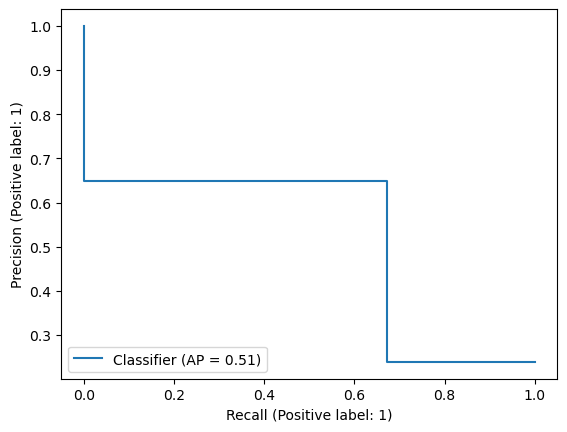

In [364]:
y_test_enc = y_test.replace({'<=50K':0,'>50K':1})
y_pred_enc = pd.Series(y_pred).replace({'<=50K':0,'>50K':1})
PrecisionRecallDisplay.from_predictions(y_test_enc, y_pred_enc, pos_label=1);